# **Aplicação do  CRISP-DM no Conjunto de dados de saúde e estilo de vida do sono - Kaggle**

Link: [Kaggle](https://www.kaggle.com/datasets/siamaktahmasbi/insights-into-sleep-patterns-and-daily-habits)

## 1° Compreensão do Negócio
* **Objetivo:** Quero identificar fatores de estilo de vida que afetam negativamente a qualidade do sono.
* **Perguntas-chave:** Nenhum, Insônia, Apneia do sono
* **Métrica de Sucesso:**  Melhorar a previsão de padrões de sono em 80% de precisão

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Compreensão dos Dados
* **Fontes de dados:** [Kaggle](https://www.kaggle.com/datasets/siamaktahmasbi/insights-into-sleep-patterns-and-daily-habits)
* **Variáveis principais:**

In [2]:
# Dados
df = pd.read_csv('./data/sleep_health_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [3]:
# tamanho do dataset
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Linhas: 400, Colunas: 13


In [4]:
# Tipo de dados 
df.dtypes

Person ID                                  int64
Gender                                    object
Age                                        int64
Occupation                                object
Sleep Duration (hours)                   float64
Quality of Sleep (scale: 1-10)           float64
Physical Activity Level (minutes/day)      int64
Stress Level (scale: 1-10)                 int64
BMI Category                              object
Blood Pressure (systolic/diastolic)       object
Heart Rate (bpm)                           int64
Daily Steps                                int64
Sleep Disorder                            object
dtype: object

In [5]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [6]:
# Descrição
df.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [7]:
# Valores nulos
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

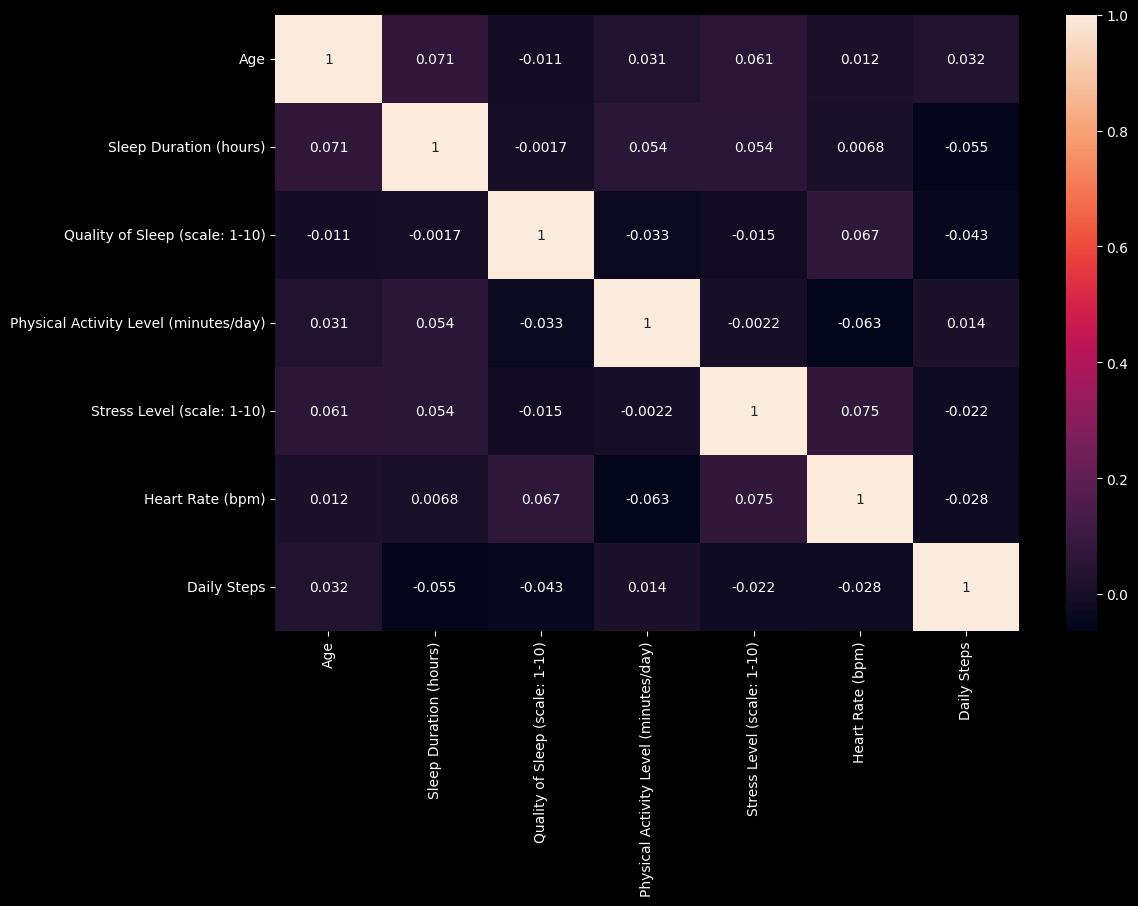

In [8]:
df_numerc = df[['Age','Sleep Duration (hours)','Quality of Sleep (scale: 1-10)','Physical Activity Level (minutes/day)','Stress Level (scale: 1-10)','Heart Rate (bpm)','Daily Steps']]
plt.figure(figsize=(12,8))
sns.heatmap(df_numerc.corr(), annot=True);

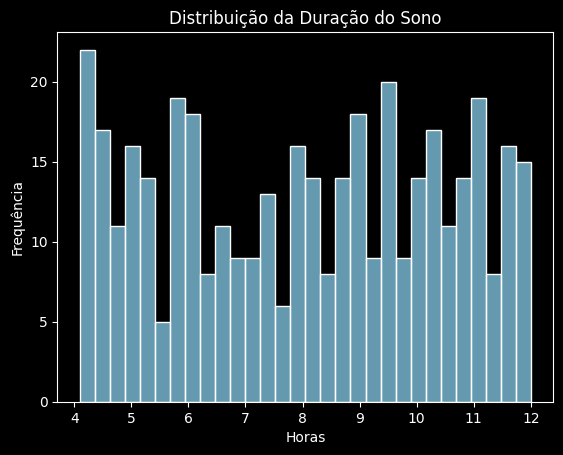

In [9]:
# Duração do sono (horas)
sns.histplot(df['Sleep Duration (hours)'], bins=30, color='skyblue')
plt.title('Distribuição da Duração do Sono')
plt.xlabel('Horas')
plt.ylabel('Frequência')
plt.show()

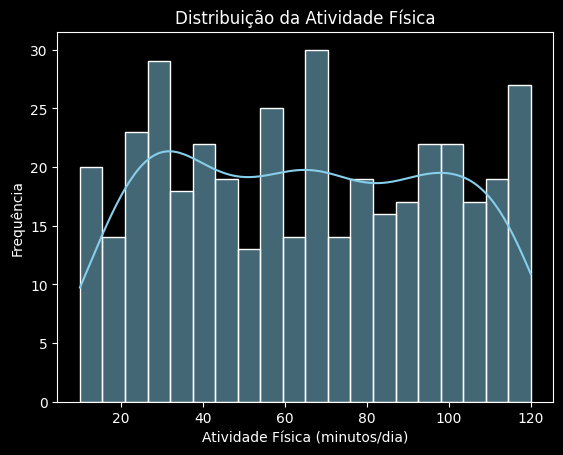

In [10]:
sns.histplot(df['Physical Activity Level (minutes/day)'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Atividade Física')
plt.xlabel('Atividade Física (minutos/dia)')
plt.ylabel('Frequência')
plt.show()

## 3. Preparação dos Dados

In [12]:
# Separando a coluna Blood Pressure (systolic/diastolic) em duas coluna systolic/diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure (systolic/diastolic)'], inplace=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,NaN,124.0,70.0
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,NaN,131.0,86.0
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,NaN,122.0,70.0
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,NaN,124.0,72.0
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133.0,78.0


In [13]:
# transformando os dados
df = pd.get_dummies(df, columns=['Gender', 'BMI Category', 'Sleep Disorder'], drop_first=True)
df.head()

,Person ID,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic_BP,Diastolic_BP,Gender_Male,BMI Category_Obese,BMI Category_Overweight,BMI Category_Underweight,Sleep Disorder_Sleep Apnea
0,1,29,Manual Labor,7.4,7.0,41,7,91,8539,124.0,70.0,True,True,False,False,False
1,2,43,Retired,4.2,4.9,41,5,81,18754,131.0,86.0,False,True,False,False,False
2,3,44,Retired,6.1,6.0,107,4,81,2857,122.0,70.0,True,False,False,True,False
3,4,29,Office Worker,8.3,10.0,20,10,55,6886,124.0,72.0,True,True,False,False,False
4,5,67,Retired,9.1,9.5,19,4,97,14945,133.0,78.0,True,False,True,False,False


In [14]:
# Padronizando (Z-Score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Heart Rate (bpm)', 'Systolic_BP', 'Diastolic_BP']] = scaler.fit_transform(df[['Heart Rate (bpm)', 'Systolic_BP', 'Diastolic_BP']])
df.head()

,Person ID,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic_BP,Diastolic_BP,Gender_Male,BMI Category_Obese,BMI Category_Overweight,BMI Category_Underweight,Sleep Disorder_Sleep Apnea
0,1,29,Manual Labor,7.4,7.0,41,7,0.995329,8539,0.219974,-0.338692,True,True,False,False,False
1,2,43,Retired,4.2,4.9,41,5,0.332218,18754,1.070703,1.443897,False,True,False,False,False
2,3,44,Retired,6.1,6.0,107,4,0.332218,2857,-0.023091,-0.338692,True,False,False,True,False
3,4,29,Office Worker,8.3,10.0,20,10,-1.391869,6886,0.219974,-0.115868,True,True,False,False,False
4,5,67,Retired,9.1,9.5,19,4,1.393195,14945,1.313769,0.552602,True,False,True,False,False
